In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle


In [29]:
#DATA COLLECTION AND ANALYSIS

In [2]:
insurance_dataset = pd.read_csv('insurance.csv')


In [3]:
#first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
#getting some information  about the dataset
insurance_dataset.info()

#we can see that no values are missing
#we can three categorical features in this dataset - sex, smoker, region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [187]:
#check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [189]:
#Data Analysis


In [191]:
#statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


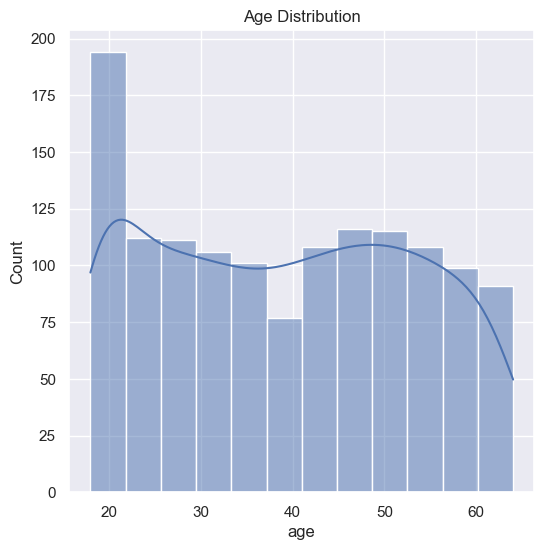

In [193]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'],kde=True)
plt.title('Age Distribution')
plt.show()


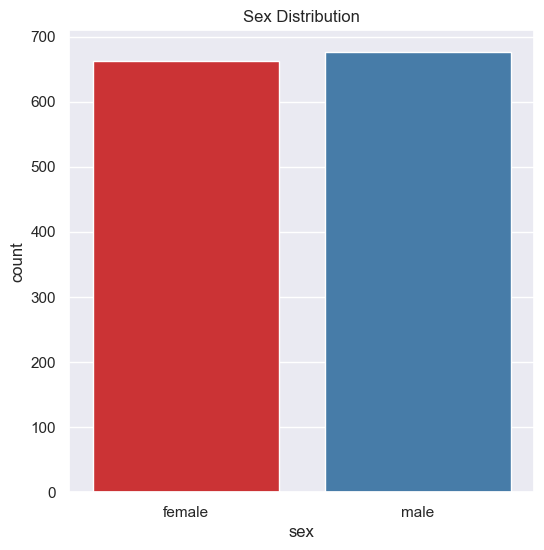

In [195]:
#gener column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset, hue='sex', palette='Set1', legend=False)
plt.title('Sex Distribution')
plt.show()

#distribution almost same for both male and female

In [196]:
#check how many male and females
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

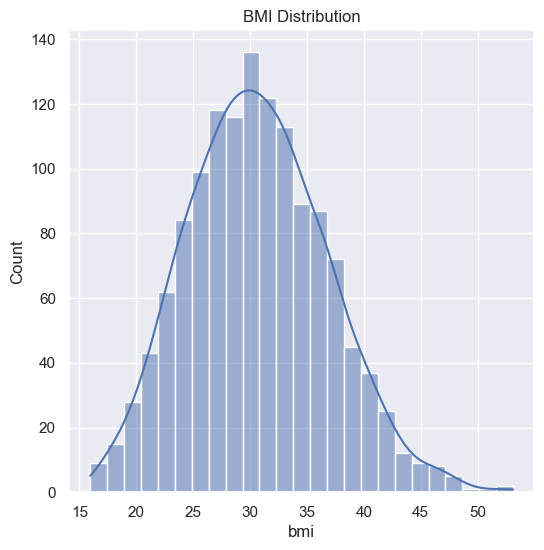

In [199]:
#BMI distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True) 
plt.title('BMI Distribution')
plt.show()

#we can see its a normal distribution

In [200]:
#Normal BMI Range -> 18.5 to 24.9
#Therefore we can see from the plot that a lot of people are over 
# this range/overweight

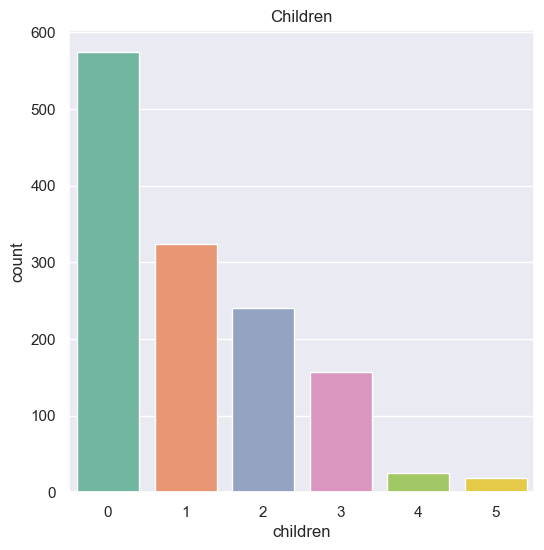

In [201]:
#Children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = insurance_dataset, hue='children', palette='Set2', legend=False)
plt.title('Children')
plt.show()

In [203]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

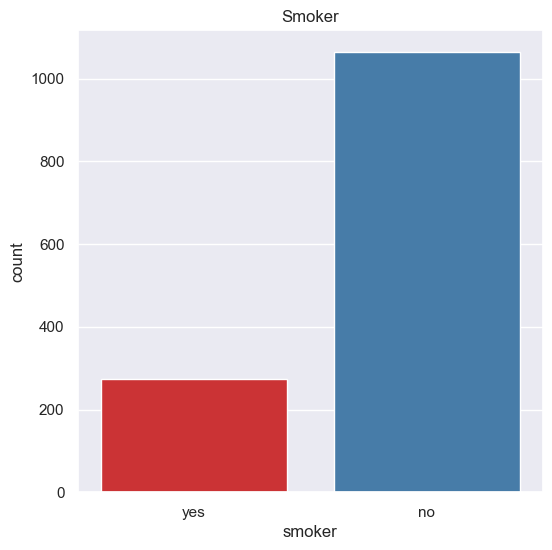

In [204]:
#Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insurance_dataset, hue='smoker', palette='Set1', legend=False)
plt.title('Smoker')
plt.show()

In [206]:
#we can see we have more non-smokers.
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

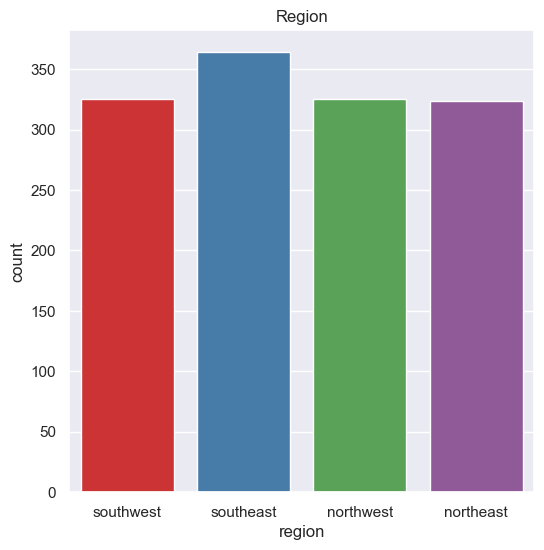

In [209]:
#Region column
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insurance_dataset, hue='region', palette='Set1', legend=False)
plt.title('Region')
plt.show()

In [211]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

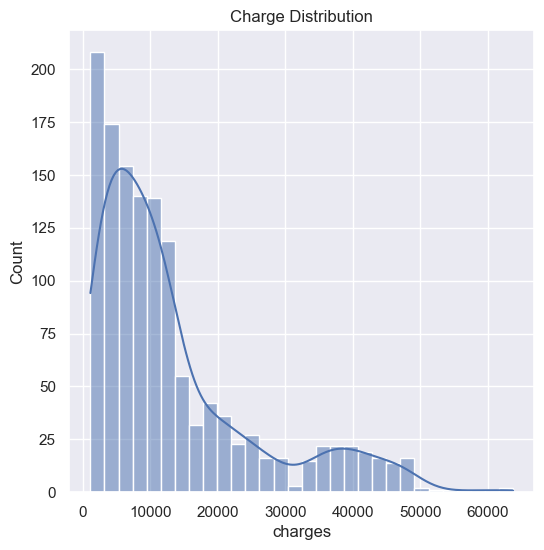

In [213]:
#distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'],kde=True)
plt.title('Charge Distribution')
plt.show()

In [214]:
#DATA PRE_PROCESSING AND FURTHER EDA

In [216]:
#Encoding categorical features

In [6]:
#encoding sex column
pd.set_option('future.no_silent_downcasting', True)

insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

#encodin smoker column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

#encoding region column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)


# Retain the old behavior by using infer_objects
insurance_dataset = insurance_dataset.infer_objects(copy=False)


In [7]:
#check that the catgeorical features have been encoded
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


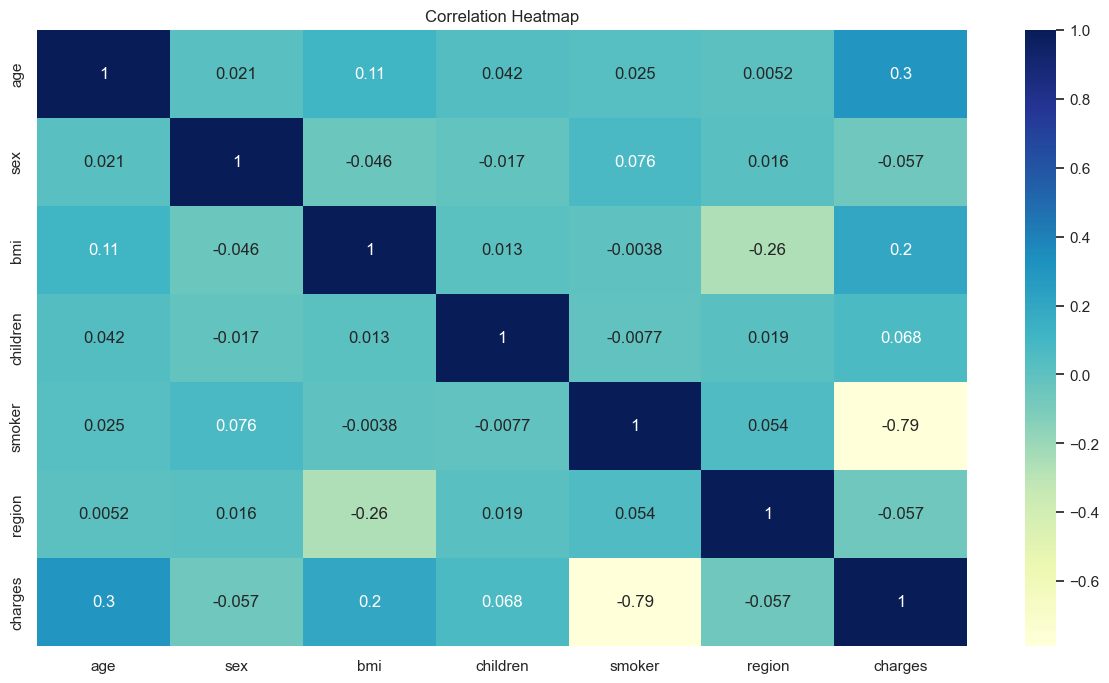

In [220]:
#Generate a correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(insurance_dataset.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

It is established from this correlation heatmap that sex, children, and region do NOT have strong correlation w charges

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

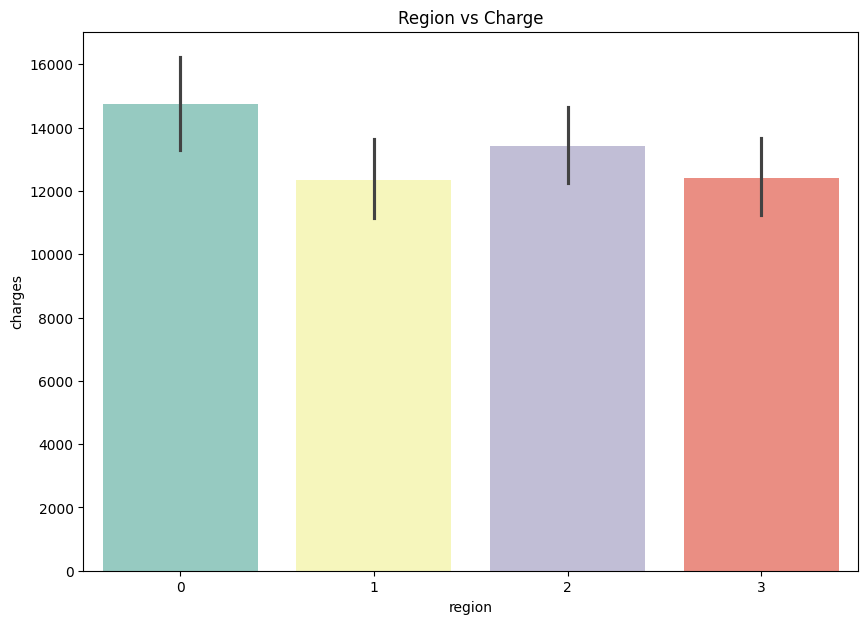

In [8]:
#Plotting a region vs charge barplot

plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region', y='charges', data=insurance_dataset, palette='Set3', hue='region', legend=False)

Barplot shows that the 'SouthEast' region has a higher 'Charge', followed by 'NorthEast'. Rest are almost same..

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

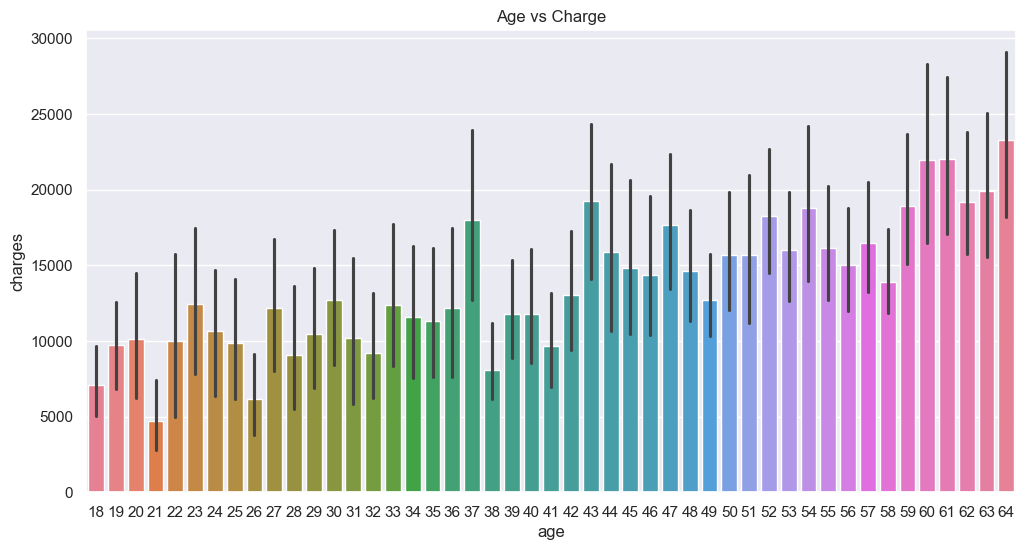

In [229]:
#Plotting a barplot for age vs charge

plt.figure(figsize=(12,6))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=insurance_dataset, palette='husl', hue='age', legend=False)

Barplot shows that charge increases as age of individual increases

Text(0.5, 1.0, 'BMI VS Charge')

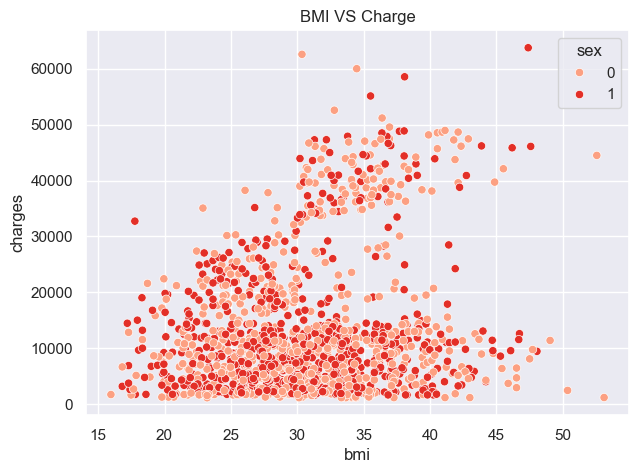

In [232]:
#Plotting BMI vs Charge graph
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=insurance_dataset,palette='Reds')
plt.title('BMI VS Charge')

Higher BMI seems to correlate to higher charges per individual. Majorly after 25 BMI point

Also, we can establish that sex does not seem to make any statistical difference in charges

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

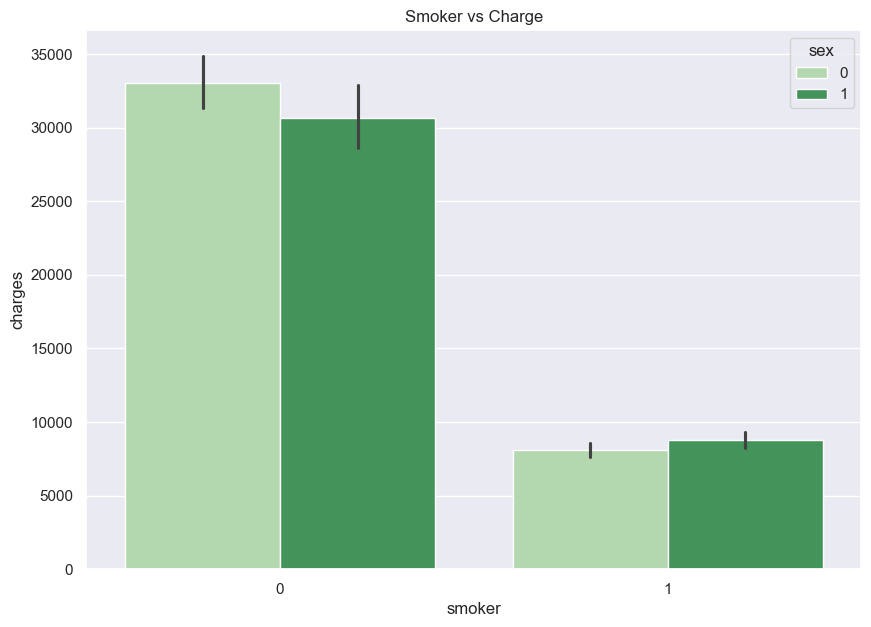

In [234]:
#Plotting Smoker vs Charge Bar Plot
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=insurance_dataset,palette='Greens',hue='sex')

As shown in this graph, being a Smoker shows a higher chance of having greater Medical Insurance Cost, making it a very relevant feature


In [237]:
#SPLITTING THE FEATURES AND TARGET

In [9]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)
Y = insurance_dataset['charges']

In [10]:
#Check X
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [11]:
#Check Y
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [12]:
#Splitting the data into Training dat and Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [13]:
#check how many rows are split into train and test 
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


MODEL TRAINING - LINEAR REGRESSION


In [14]:
#loading the linear regression model
reg = LinearRegression()


In [15]:
reg.fit(X_train, Y_train) #this will plot the line and fit the regressor

LinearRegression()

Model Evaluation

In [16]:
#prediction of training data


training_data_prediction = reg.predict(X_train)
test_data_prediction = reg.predict(X_test)

#Performance metric
r2_train = metrics.r2_score(Y_train, training_data_prediction)
r2_test = metrics.r2_score(Y_test, test_data_prediction)

model_filename = 'insurance_model_LinearRegression.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(reg, file)

print(f"Model saved as {model_filename}")
print("R2 Score (Train): {:.3f}".format(r2_train))
print("R2 Score (Test): {:.3f}".format(r2_test))


Model saved as insurance_model_LinearRegression.pkl
R2 Score (Train): 0.752
R2 Score (Test): 0.745


The values are almostn equal to each other so there is no issue of overfitting

BUILDING A PREDICTIVE SYSTEM


In [17]:
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
input_data = (31,1,25.74,0,1,0)

input_data_df = pd.DataFrame([input_data], columns=feature_names)



In [18]:
input_data_df

,age,sex,bmi,children,smoker,region
0,31,1,25.74,0,1,0


In [19]:
# Predict using the model
prediction = reg.predict(input_data_df)

# Output the prediction
print('The insurance cost is USD', prediction[0])

#compare this value to actual value (3756.62)

The insurance cost is USD 3760.0805764960533


In [ ]:
# Printing Mean Squared Error
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 38337035.48643883
Root Mean Squared Error (RMSE): 6191.690842285234


SVM REGRESSION MODEL:

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [21]:
X_c = insurance_dataset.drop('charges', axis=1).values
Y_c = insurance_dataset['charges'].values.reshape(-1, 1)

In [22]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,Y_c,test_size=0.2, random_state=42)

In [23]:
# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_c)
X_test_scaled = scaler_X.transform(X_test_c)

In [24]:
# Scale the target variable
scaler_Y = StandardScaler()
Y_train_scaled = scaler_Y.fit_transform(y_train_c).ravel()
Y_test_scaled = scaler_Y.transform(y_test_c).ravel()

In [27]:
# Initialize the SVR model
svr = SVR()

In [28]:
# Define the hyperparameter grid for tuning
parameters = {
    'kernel': ['rbf', 'linear', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'tol': [0.0001, 0.001]
}

# Perform grid search with cross-validation
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, Y_train_scaled)


Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 4/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.847 total time=   0.0s
[CV 2/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.746 total time=   0.0s
[CV 1/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.807 total time=   0.1s
[CV 3/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.842 total time=   0.0s
[CV 5/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.780 total time=   0.1s
[CV 9/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.808 total time=   0.0s
[CV 7/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.685 total time=   0.0s
[CV 1/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.001;, score=0.807 total time=   0.0s
[CV 10/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.0001;, score=0.795 total time=   0.1s
[CV 2/10] END C=0.1, gamma=scale, kernel=rbf, tol=0.001;, score=0.746 total time=   0.1s
[CV 8/10] END C=0.1, gamma=scale, kern

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ['rbf', 'linear', 'sigmoid'],
                         'tol': [0.0001, 0.001]},
             verbose=4)

In [34]:
# Use the best estimator from grid search
best_svr = svr_grid.best_estimator_

# Train the model with the BEST hyperparameters
best_svr.fit(X_train_scaled, Y_train_scaled)

SVR(C=1)

In [53]:
# Predict on the training and test sets
Y_pred_train = best_svr.predict(X_train_scaled)
Y_pred_test = best_svr.predict(X_test_scaled)

# Calculate evaluation metrics
r2_train = r2_score(Y_train_scaled, Y_pred_train)
r2_test = r2_score(Y_test_scaled, Y_pred_test)

with open('insurance_model_svr.pkl', 'wb') as file:
    pickle.dump({'model': best_svr, 'scaler_Y': scaler_Y}, file)
print(f"Model saved as {model_filename}")

Model saved as insurance_model_svr.pkl


In [283]:
print("Best SVR Parameters:", svr_grid.best_estimator_)
print("R2 Score (Train): {:.3f}".format(r2_train))
print("R2 Score (Test): {:.3f}".format(r2_test))

Best SVR Parameters: SVR(C=1)
R2 Score (Train): 0.854
R2 Score (Test): 0.866


Based on the performance metric, we can clearly see that SVM model better explains the variability in target variable. Making it better than simple linear regression

In [286]:
#Other performance metrics
mse_test = mean_squared_error(Y_test_scaled, Y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Mean Squared Error (MSE): {:.3f}".format(mse_test))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse_test))

Mean Squared Error (MSE): 0.144
Root Mean Squared Error (RMSE): 0.380


In [289]:
print("Hello")

Hello


RANDOM FOREST REGRESSION MODEL


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
# Define the hyperparameter grid
rf_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [42]:
# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

In [47]:
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=10, verbose=0, n_jobs=-1)
rf_grid.fit(X_train_scaled, Y_train_scaled)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [48]:
# Use the best estimator from grid search
best_rf = rf_grid.best_estimator_

# Train the model with the best hyperparameters
best_rf.fit(X_train_scaled, Y_train_scaled)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [49]:
# Predict on the training and test sets
Y_pred_train_rf = best_rf.predict(X_train_scaled)
Y_pred_test_rf = best_rf.predict(X_test_scaled)

In [55]:
# Calculate evaluation metrics
r2_train_rf = r2_score(Y_train_scaled, Y_pred_train_rf)
r2_test_rf = r2_score(Y_test_scaled, Y_pred_test_rf)

with open('insurance_model_rf.pkl', 'wb') as file:
    pickle.dump({'model': best_rf, 'scaler_Y': scaler_Y}, file)
print(f"Model saved as {model_filename}")
# Print the best parameters, R² scores, and error metrics
print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Random Forest R² Score (Train): {:.3f}".format(r2_train_rf))
print("Random Forest R² Score (Test): {:.3f}".format(r2_test_rf))

Model saved as insurance_model_svr.pkl
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest R² Score (Train): 0.909
Random Forest R² Score (Test): 0.878


In [298]:
# Calculate MSE and RMSE for the test set
mse_test_rf = mean_squared_error(Y_test_scaled, Y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

print("Random Forest MSE (Test): {:.3f}".format(mse_test_rf))
print("Random Forest RMSE (Test): {:.3f}".format(rmse_test_rf))


Random Forest MSE (Test): 0.131
Random Forest RMSE (Test): 0.363
